In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names=['pool_id',
'loan_id',
'act_period',
'channel',
'seller',
'servicer',
'master_servicer',
'orig_rate',
'curr_rate',
'orig_upb',
'issuance_upb',
'current_upb',
'orig_term',
'orig_date',
'first_pay',
'loan_age',
'rem_months',
'adj_rem_months',
'matr_dt',
'oltv',
'ocltv',
'num_bo',
'dti',
'cscore_b',
'cscore_c',
'first_flag',
'purpose',
'prop',
'no_units',
'occ_stat',
'state',
'msa',
'zip',
'mi_pct',
'product',
'ppmt_flg',
'io',
'first_pay_io',
'mnths_to_amtz_io',
'dlq_status',
'pmt_history',
'mod_flag',
'mi_cancel_flag',
'zero_bal_code',
'zb_dte',
'last_upb',
'rprch_dte',
'curr_schd_prncpl',
'tot_schd_prncpl',
'unschd_prncpl_curr',
'last_paid_installment_date',
'foreclosure_date',
'disposition_date',
'foreclosure_costs',
'property_preservation_and_repair_costs',
'asset_recovery_costs',
'miscellaneous_holding_expenses_and_credits',
'associated_taxes_for_holding_property',
'net_sales_proceeds',
'credit_enhancement_proceeds',
'repurchases_make_whole_proceeds',
'other_foreclosure_proceeds',
'non_interest_bearing_upb',
'principal_forgiveness_amount',
'original_list_start_date',
'original_list_price',
'current_list_start_date',
'current_list_price',
'issue_scoreb',
'issue_scorec',
'curr_scoreb',
'curr_scorec',
'mi_type',
'serv_ind',
'current_period_modification_loss_amount',
'cumulative_modification_loss_amount',
'current_period_credit_event_net_gain_or_loss',
'cumulative_credit_event_net_gain_or_loss',
'homeready_program_indicator',
'foreclosure_principal_write_off_amount',
'relocation_mortgage_indicator',
'zero_balance_code_change_date',
'loan_holdback_indicator',
'loan_holdback_effective_date',
'delinquent_accrued_interest',
'property_inspection_waiver_indicator',
'high_balance_loan_indicator',
'arm_5_yr_indicator',
'arm_product_type',
'months_until_first_payment_reset',
'months_between_subsequent_payment_reset',
'interest_rate_change_date',
'payment_change_date',
'arm_index',
'arm_cap_structure',
'initial_interest_rate_cap',
'periodic_interest_rate_cap',
'lifetime_interest_rate_cap',
'margin',
'balloon_indicator',
'plan_number',
'forbearance_indicator',
'high_loan_to_value_hltv_refinance_option_indicator',
'deal_name',
're_procs_flag',
'adr_type',
'adr_count',
'adr_upb',
'random','threshold']

In [3]:
col_classes=['str',
'str',
'str',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'str',
'float',
'str',
'float',
'float',
'float',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'float',
'float',
'str',
'float',
'float',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'str',
'str',
'str',
'str',
'float',
'float',
'float',
'float',
'str',
'float',
'str',
'str',
'str',
'str',
'str',
'float',
'float',
'float','float']

In [4]:
acquisiton_columns=[
'loan_id',
'channel',
'orig_rate',
'orig_upb',
'orig_term',
'orig_date',
'first_pay',
'matr_dt',
'oltv',
'ocltv',
'num_bo',
'dti',
'cscore_b',
'cscore_c',
'first_flag',
'purpose',
'prop',
'no_units',
'occ_stat',
'state',
'msa',
'zip',
'mi_pct',
'product',
'ppmt_flg',
'io',
'first_pay_io',
'mi_type',
'homeready_program_indicator',
'relocation_mortgage_indicator',
'high_balance_loan_indicator',
'arm_5_yr_indicator',
'arm_product_type',
'months_until_first_payment_reset',
'months_between_subsequent_payment_reset',
'arm_index',
'arm_cap_structure',
'initial_interest_rate_cap',
'periodic_interest_rate_cap',
'lifetime_interest_rate_cap',
'margin',
'balloon_indicator',
'plan_number',
'high_loan_to_value_hltv_refinance_option_indicator'
]

In [5]:
performance_columns = ['act_period',
'loan_age',
'rem_months',
'dlq_status',
'zero_bal_code',
'zb_dte'
]

In [6]:
col_dict = dict(zip(col_names,col_classes)) 

In [7]:
df = pd.read_csv('Group_Project_1_small.csv',sep='|',header=None,names=col_names,dtype=col_dict,)


In [8]:
parse_dates = ['orig_date','first_pay','zb_dte','act_period','matr_dt']
for i in parse_dates:
    df[i] = pd.to_datetime(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580106 entries, 298503 to 5422551
Columns: 110 entries, pool_id to threshold
dtypes: datetime64[ns](5), float64(55), object(50)
memory usage: 491.3+ MB


In [10]:
#Step 2
def my_logic(row):
    if row['zero_bal_code'] in ['09','03','02','06','15','16']:
        return 'D'
    elif row['zero_bal_code'] in ['01']:
        return 'P'
    elif row['dlq_status'] not in ('00','01','02','03','04','05'):
        return 'D'
    else:
        return 'A'
    
df['target'] = df.apply(my_logic,axis=1)

In [11]:
df.groupby(['target'],dropna=False)['loan_id'].count()

target
A    228984
D    180135
P    170987
Name: loan_id, dtype: int64

In [12]:
#Step 3  
temp_df = df[df['target']!='A'].groupby(['loan_id']).agg({'act_period':'min'}).reset_index().rename(columns={'act_period':'last_period'})

In [13]:
temp_df

,loan_id,last_period
0,000097473078,2021-03-20
1,000097473159,2021-06-20
2,000097473417,2021-09-20
3,000097473471,2021-04-20
4,000097473651,2020-11-20
...,...,...
328876,999986755734,2003-12-20
328877,999990214356,2008-02-20
328878,999996807189,2016-08-20
328879,999997685687,2012-09-20


In [14]:
df=df.merge(temp_df,on='loan_id',how='left')

In [15]:
df = df.loc[~((df['act_period']>df['last_period'])),:]

In [16]:
obs_count = df.shape[0]

In [17]:
obs_count

557576

In [18]:
missings = (df.isnull().sum()/obs_count).sort_values(ascending=False).to_frame()

In [19]:
len(missings)

112

In [20]:
(missings > 0.95).sum() , (missings < 0.95).sum()  # total of these two is equals to 112 = len(missings) there is no value at 0.95

(0    57
 dtype: int64,
 0    55
 dtype: int64)

In [21]:
type(missings)

pandas.core.frame.DataFrame

In [22]:
#cols_majority_miss = missings.loc[missings > 0.95].index.tolist()

In [23]:
threshold = 0.95
missing_cols = missings[missings[0] > threshold].index



In [24]:
missing_cols

Index(['pool_id', 'issue_scorec', 'loan_holdback_indicator',
       'unschd_prncpl_curr', 'cumulative_credit_event_net_gain_or_loss',
       'current_period_credit_event_net_gain_or_loss',
       'cumulative_modification_loss_amount',
       'current_period_modification_loss_amount', 'curr_scorec', 'curr_scoreb',
       'issue_scoreb', 'delinquent_accrued_interest', 'current_list_price',
       'current_list_start_date', 'original_list_price',
       'original_list_start_date', 'first_pay_io', 'mnths_to_amtz_io',
       'mi_cancel_flag', 'rprch_dte', 'loan_holdback_effective_date',
       'zero_balance_code_change_date', 'arm_5_yr_indicator',
       'periodic_interest_rate_cap', 'deal_name', 'plan_number',
       'master_servicer', 'arm_product_type', 'margin',
       'lifetime_interest_rate_cap', 'issuance_upb', 'balloon_indicator',
       'initial_interest_rate_cap', 'arm_cap_structure', 'arm_index',
       'payment_change_date', 'interest_rate_change_date',
       'months_between_su

In [25]:
df.drop(missing_cols,inplace=True,axis=1)

In [26]:
df.shape

(557576, 55)

In [27]:
# we calculate loan_age from origination date and accounting period
df['act_preiod'] = pd.to_datetime(df['act_period'])
df['act_period'].day = 30
df['calc_age'] = ((df['act_period'] - df['orig_date'])/np.timedelta64(1,'M'))
df['calc_age'] = df['calc_age'].astype(int)+1
df['age_dif'] = df['calc_age'] - df['loan_age']
                

In [28]:
df.loc[(df['loan_age'].isnull()),'loan_age'] = df['calc_age']
missings = df['curr_rate'].isnull().sum()

In [29]:
df.isnull().sum().sum(), df.notnull().sum().sum(), df.isnull().sum().sum()/df.notnull().sum().sum()

(7342487, 24996921, 0.2937356564834525)

# Imputing

In [30]:
def fill_numerical_values(df,x_var):
    df[x_var] = df[x_var].fillna(df[x_var].median())

In [31]:
def fill_cat_values(df,x_var):
    
    #filling with most common class
    df = df.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [32]:
num_cols = ['orig_rate','orig_upb','orig_term','loan_age','rem_months','oltv','ocltv','dti','cscore_b','cscore_c','mi_pct']
cat_cols = ['channel','first_flag','purpose','prop','no_units','occ_stat','state','product','ppmt_flg','io','mi_type',
           'homeready_program_indicator','relocation_mortgage_indicator','high_balance_loan_indicator',
            'high_loan_to_value_hltv_refinance_option_indicator','num_bo']

In [33]:
for i in (num_cols):
    fill_numerical_values(df,i)

In [34]:
for i in (cat_cols):
    
    fill_cat_values(df,i)

In [35]:
#Step 5
df.orig_upb,df.oltv

(0         183000.0
 1         108000.0
 2         417000.0
 3         393000.0
 4          86000.0
             ...   
 580101     56000.0
 580102    360000.0
 580103    126000.0
 580104    164000.0
 580105    275000.0
 Name: orig_upb, Length: 557576, dtype: float64,
 0         42.0
 1         68.0
 2         50.0
 3         55.0
 4         95.0
           ... 
 580101    75.0
 580102    69.0
 580103    69.0
 580104    74.0
 580105    75.0
 Name: oltv, Length: 557576, dtype: float64)

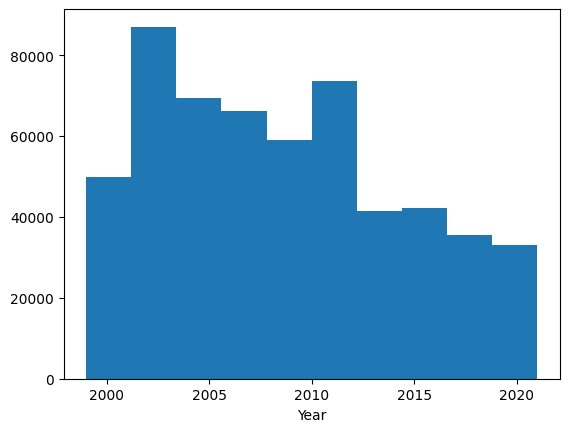

In [36]:
# Cleaning Columns and creating new variables
df['Vintage']=df['orig_date'].dt.year
plt.hist(df['Vintage'])
plt.xlabel('Year');

In [37]:
#Check Outliers
def cap_floor(df,x_val):
    q_l = df[x_val].quantile(0.01)
    q_h = df[x_val].quantile(0.99)
    
    df.loc[df[x_val] <= q_l, x_val] = q_l
    df.loc[df[x_val] >= q_h, x_val] = q_h

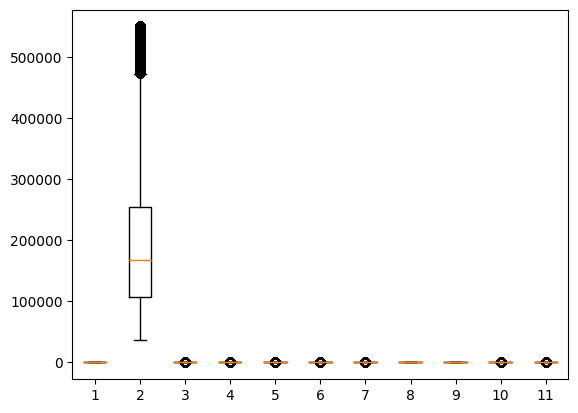

In [38]:
for i in (num_cols):
    cap_floor(df,i)

x = df[['orig_rate',
 'orig_upb',
 'orig_term',
 'loan_age',
 'rem_months',
 'oltv',
 'ocltv',
 'dti',
 'cscore_b',
 'cscore_c',
 'mi_pct']]
plt.boxplot(x);

In [39]:
df.orig_upb.describe()

count    557576.000000
mean     191937.983342
std      110039.412296
min       36000.000000
25%      108000.000000
50%      167000.000000
75%      254000.000000
max      550000.000000
Name: orig_upb, dtype: float64

In [40]:
#Step 7
def univariate_plot_v3(df,x_var,y_var,bin_size):
    if x_var in num_cols:
        fig,ax = plt.subplots()
        s = df.groupby([pd.cut(df[x_var],bins=bin_size,precision=0)]).agg({'loan_id':'count',y_var:'mean'})
        sns.barplot(x=x_var,y='loan_id',data=s.reset_index(),palette='Blues_d',ax=ax)
        ax2=ax.twinx()
        sns.lineplot(x = range(len(s.reset_index())),y=y_var,data=s.reset_index(),color='red',markers=True,ax=ax2)
        ax.set_xticklabels(s.index.values,rotation=45,ha='right')
    elif x_var in cat_cols:
        fig,ax = plt.subplots()
        s = df.groupby(df[x_var]).agg({'loan_id':'count',y_var:'mean'})
        sns.barplot(x=x_var,y='loan_id',data=s.reaset_index(),palette='Blues_d',ax=ax)
        ax2=ax.twinx()
        sns.lineplot(x=range(len(s.reset_index())),y=y_var,data=s.reset_index(),color='red',markers=True,ax=ax2)
        ax.set_xticklabels(s.index.values,rotation=45,ha='right')
    

In [41]:
df.target.value_counts()

A    228695
P    170874
D    158007
Name: target, dtype: int64

In [42]:
df_default = df[df['target'].isin(['A', 'D'])]


In [43]:
df_default.target.value_counts()

A    228695
D    158007
Name: target, dtype: int64

In [44]:
df['default'] = df['target'].apply(lambda x: 1 if x in ['A', 'D'] else 0)


In [45]:
df.default.value_counts()

1    386702
0    170874
Name: default, dtype: int64

In [46]:
new_column =acquisiton_columns +performance_columns
z =[ x for x in col_names if x not in new_column]
#df.drop([ x for x in col_dict if x not in new_column], inplace=True, axis=1)
len(z),len(missing_cols)

(60, 57)

In [47]:
for i in z:
    if (i == missing_cols).all():
        continue  # skip this element and move on to the next one
    else:
        print(i)  # print this element
list(missing_cols)

pool_id
seller
servicer
master_servicer
curr_rate
issuance_upb
current_upb
adj_rem_months
mnths_to_amtz_io
pmt_history
mod_flag
mi_cancel_flag
last_upb
rprch_dte
curr_schd_prncpl
tot_schd_prncpl
unschd_prncpl_curr
last_paid_installment_date
foreclosure_date
disposition_date
foreclosure_costs
property_preservation_and_repair_costs
asset_recovery_costs
miscellaneous_holding_expenses_and_credits
associated_taxes_for_holding_property
net_sales_proceeds
credit_enhancement_proceeds
repurchases_make_whole_proceeds
other_foreclosure_proceeds
non_interest_bearing_upb
principal_forgiveness_amount
original_list_start_date
original_list_price
current_list_start_date
current_list_price
issue_scoreb
issue_scorec
curr_scoreb
curr_scorec
serv_ind
current_period_modification_loss_amount
cumulative_modification_loss_amount
current_period_credit_event_net_gain_or_loss
cumulative_credit_event_net_gain_or_loss
foreclosure_principal_write_off_amount
zero_balance_code_change_date
loan_holdback_indicator
loan

['pool_id',
 'issue_scorec',
 'loan_holdback_indicator',
 'unschd_prncpl_curr',
 'cumulative_credit_event_net_gain_or_loss',
 'current_period_credit_event_net_gain_or_loss',
 'cumulative_modification_loss_amount',
 'current_period_modification_loss_amount',
 'curr_scorec',
 'curr_scoreb',
 'issue_scoreb',
 'delinquent_accrued_interest',
 'current_list_price',
 'current_list_start_date',
 'original_list_price',
 'original_list_start_date',
 'first_pay_io',
 'mnths_to_amtz_io',
 'mi_cancel_flag',
 'rprch_dte',
 'loan_holdback_effective_date',
 'zero_balance_code_change_date',
 'arm_5_yr_indicator',
 'periodic_interest_rate_cap',
 'deal_name',
 'plan_number',
 'master_servicer',
 'arm_product_type',
 'margin',
 'lifetime_interest_rate_cap',
 'issuance_upb',
 'balloon_indicator',
 'initial_interest_rate_cap',
 'arm_cap_structure',
 'arm_index',
 'payment_change_date',
 'interest_rate_change_date',
 'months_between_subsequent_payment_reset',
 'months_until_first_payment_reset',
 'curr_schd_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1496\875774404.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


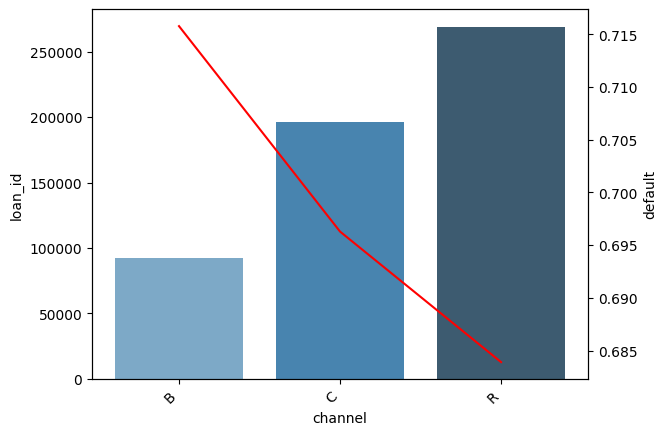

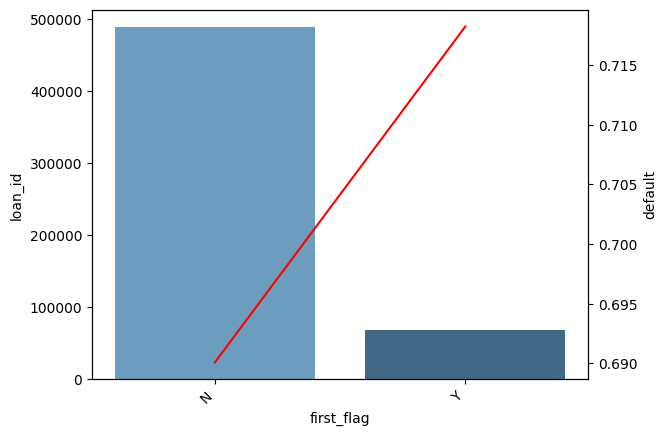

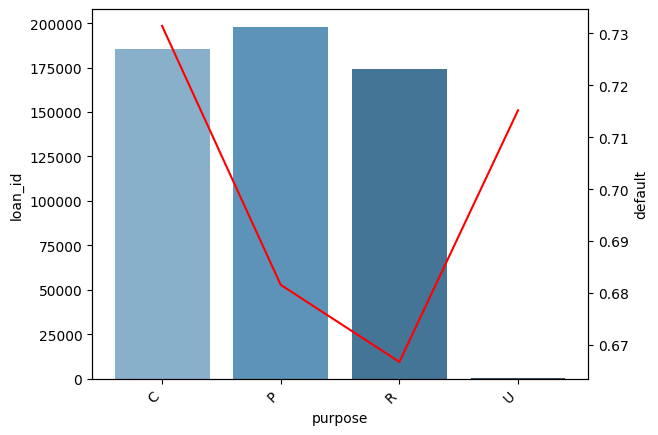

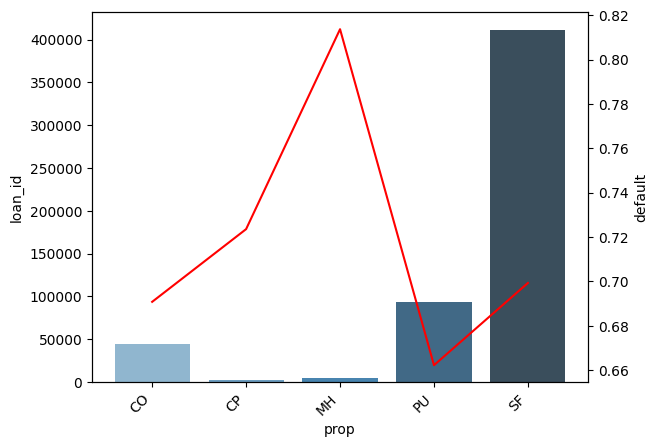

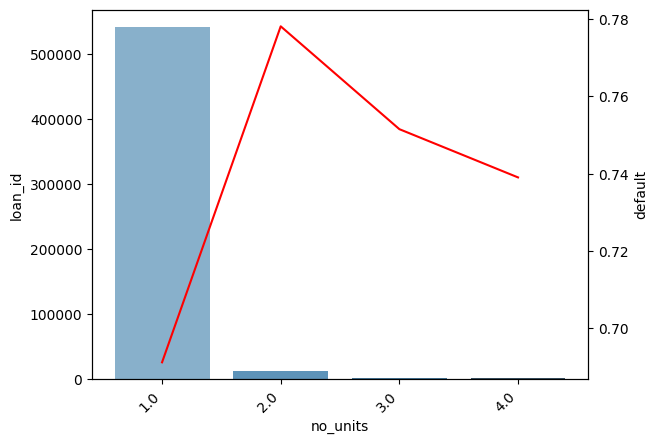

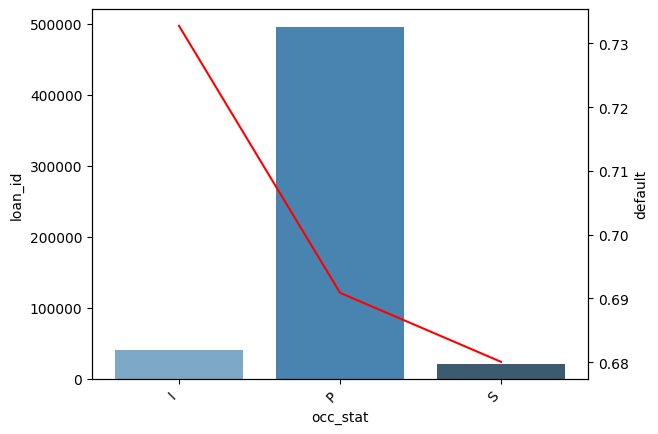

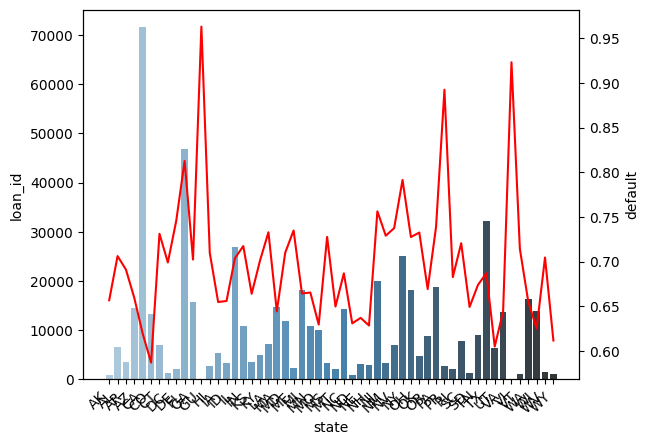

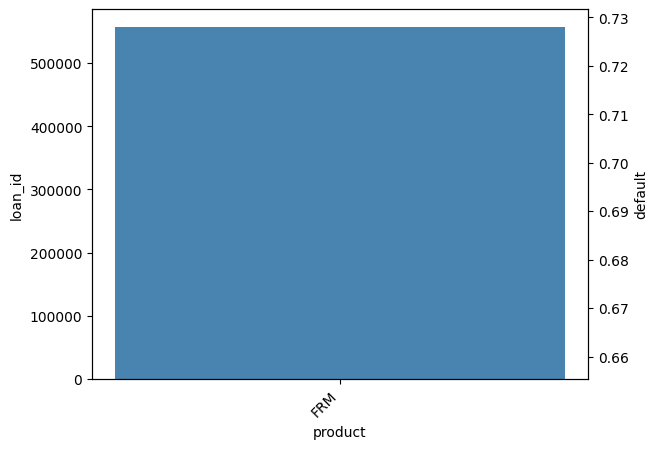

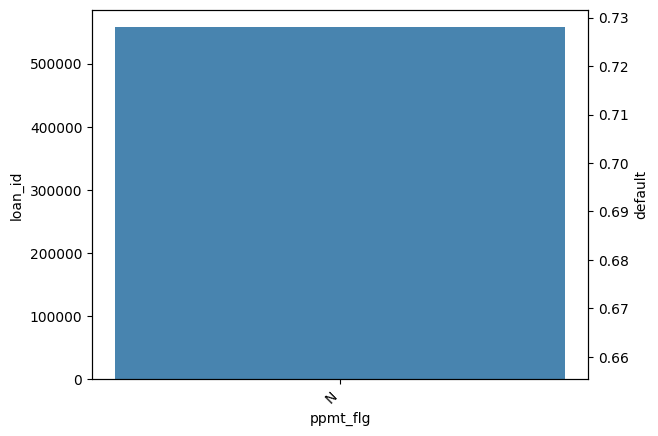

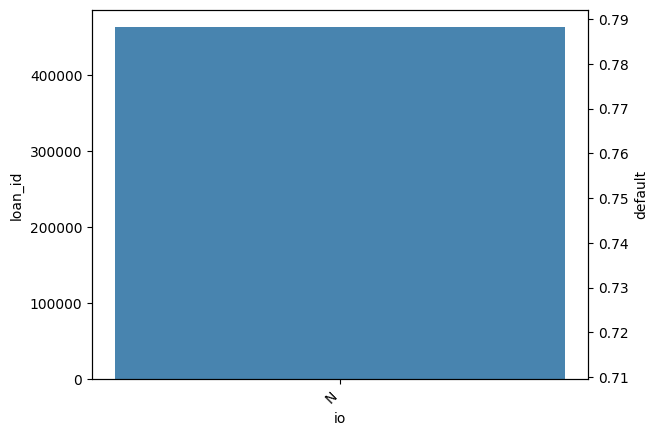

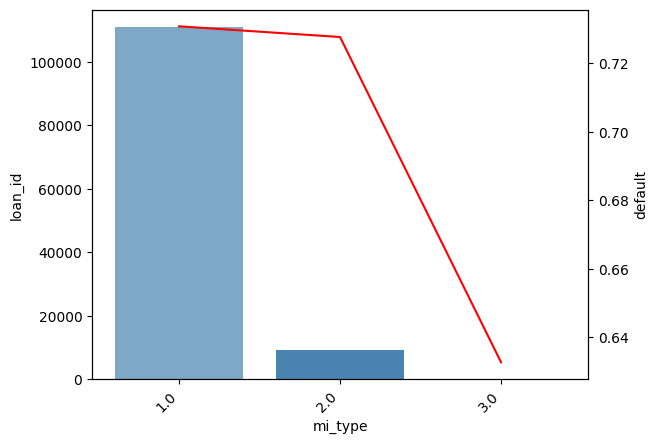

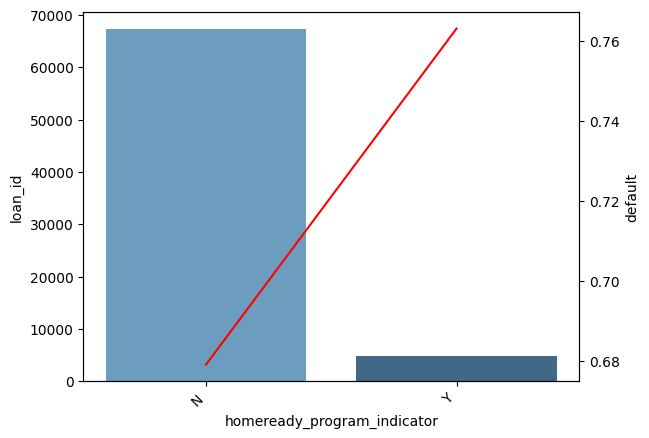

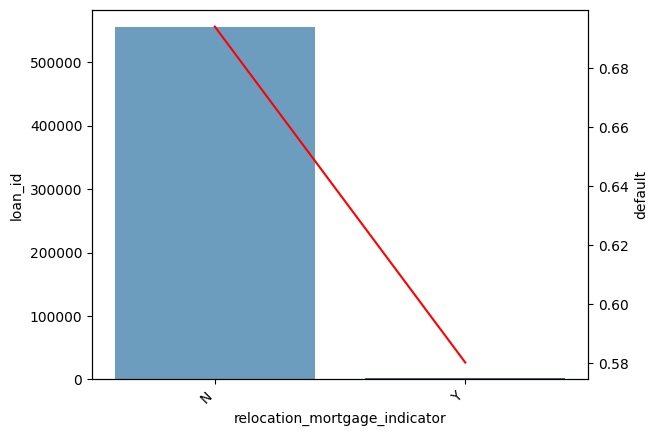

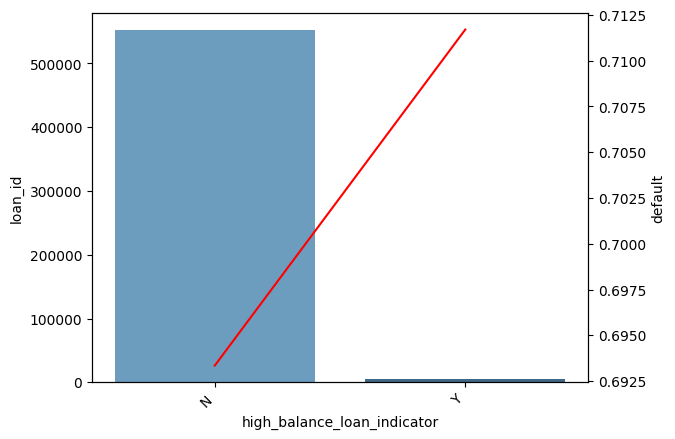

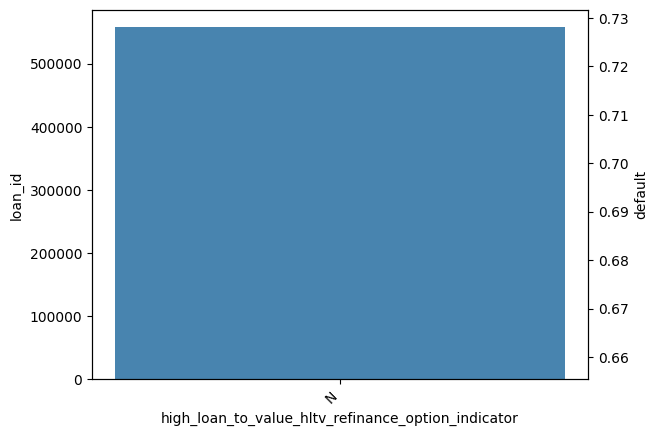

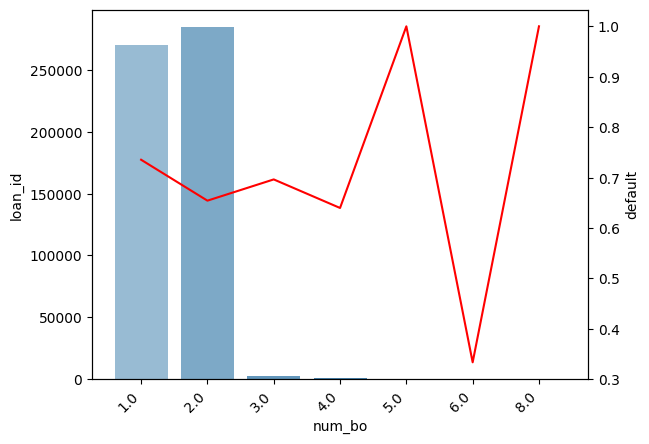

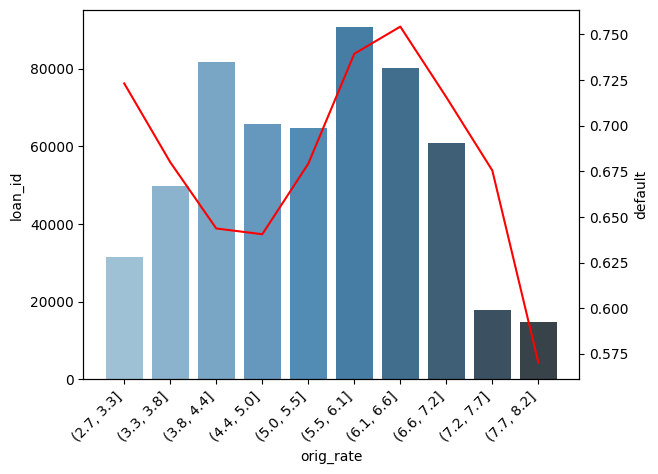

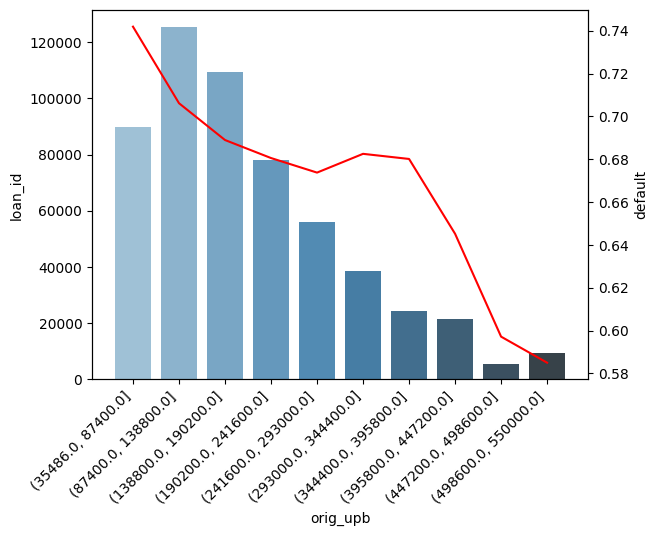

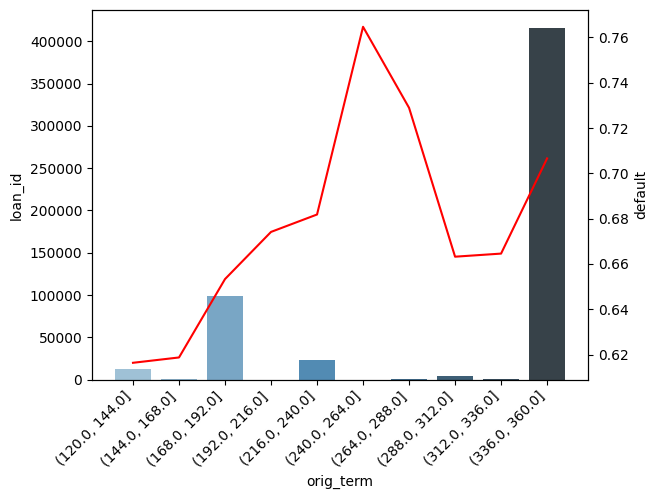

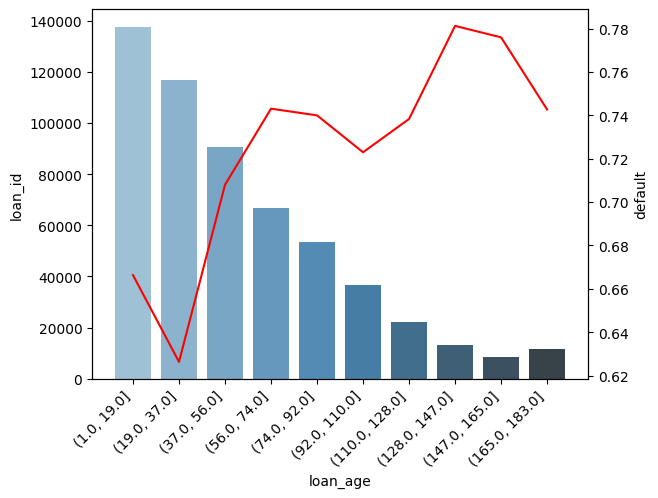

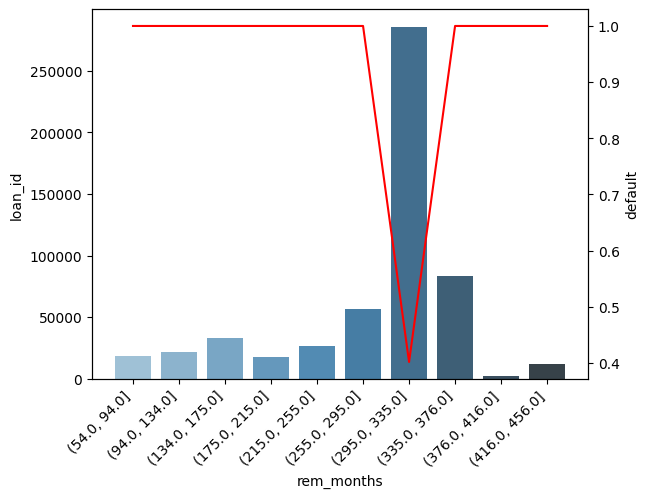

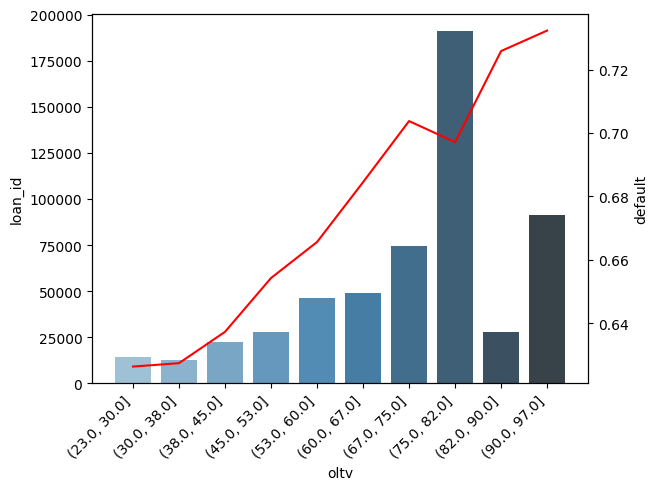

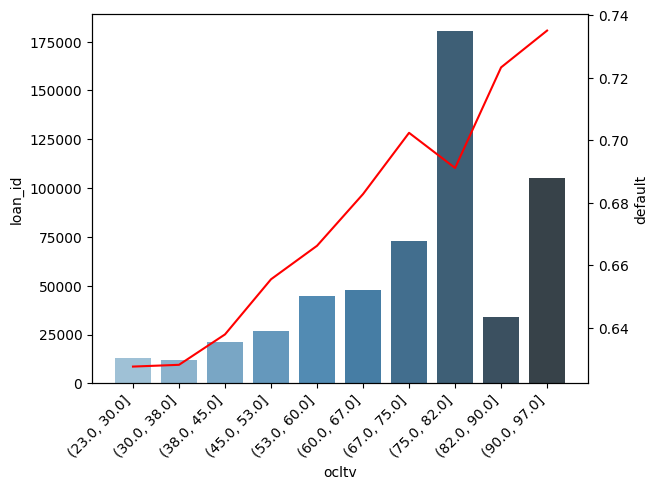

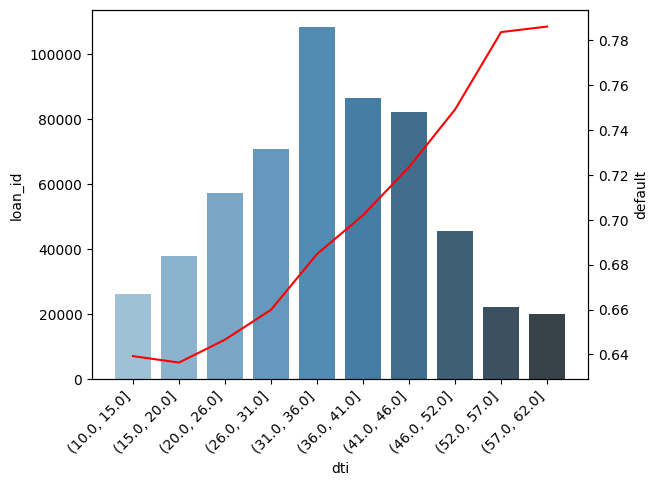

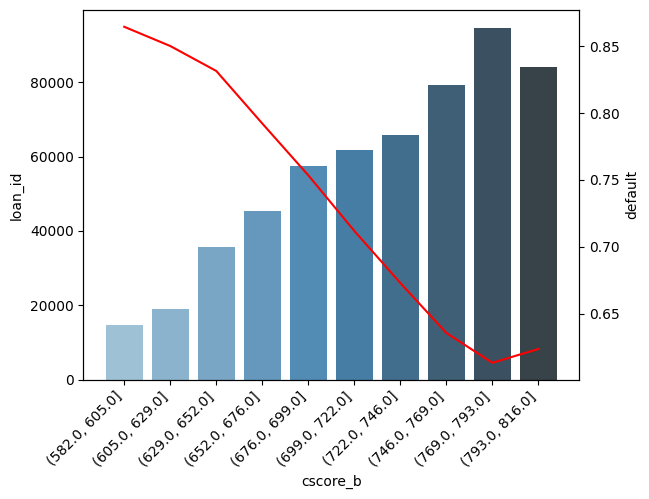

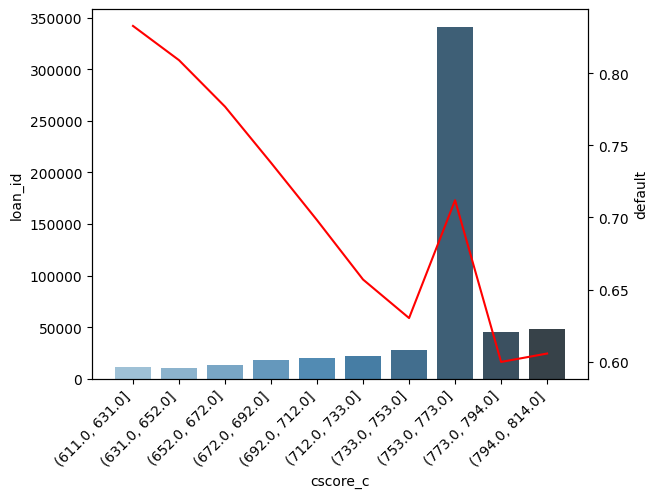

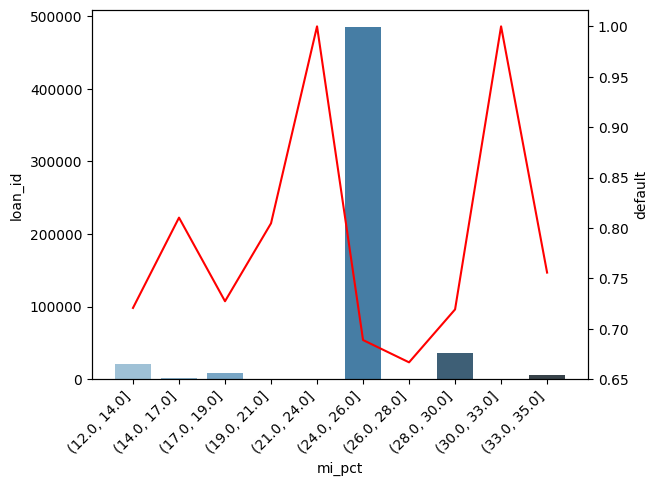

In [48]:
vars_to_plot = cat_cols+num_cols

for i in (vars_to_plot):
    univariate_plot_v3(df,i,'default',10)

In [49]:
len(df.columns)

60

In [50]:
cols_no_variation = ['product', 'ppmt_flg','high_loan_to_value_hltv_refinance_option_indicator','io']

In [51]:
df.drop(cols_no_variation, inplace=True, axis=1)

In [52]:
vars_to_plot = [x for x in vars_to_plot if x not in cols_no_variation]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1496\875774404.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots()


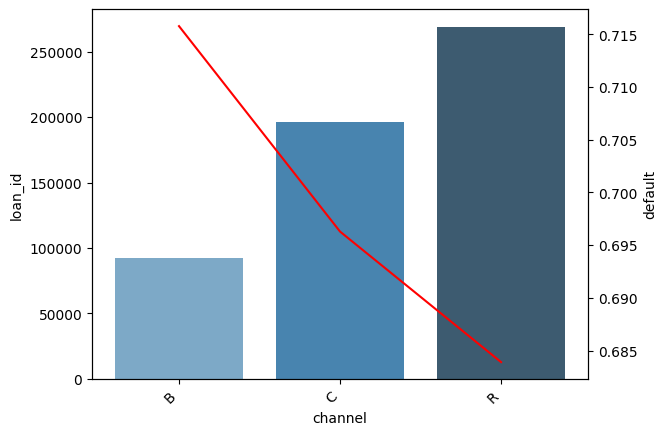

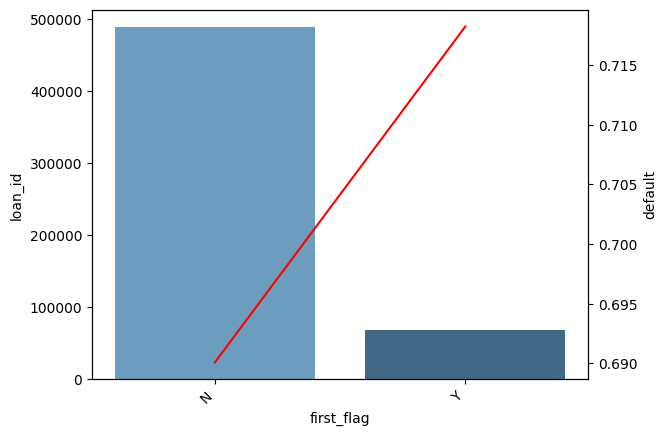

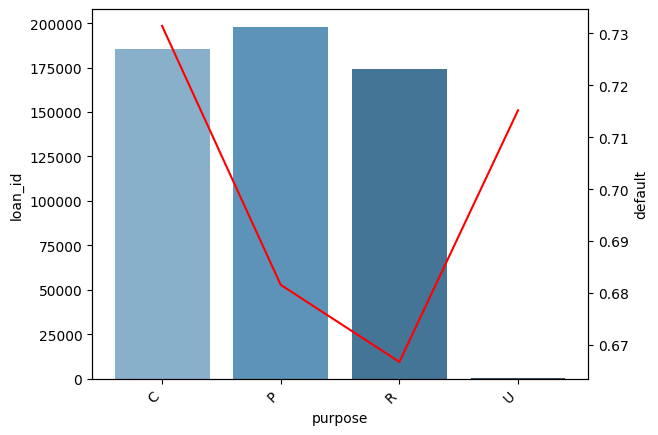

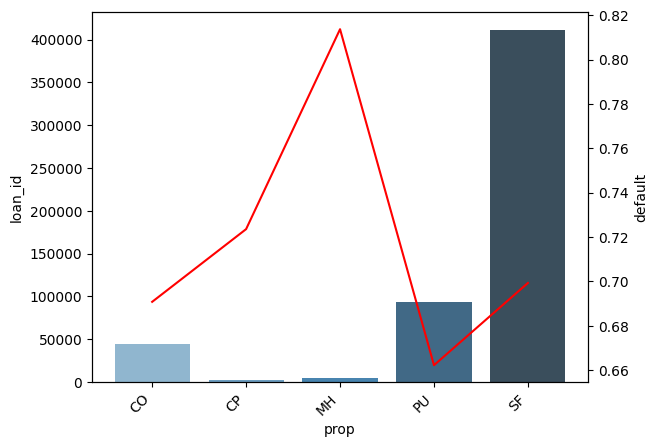

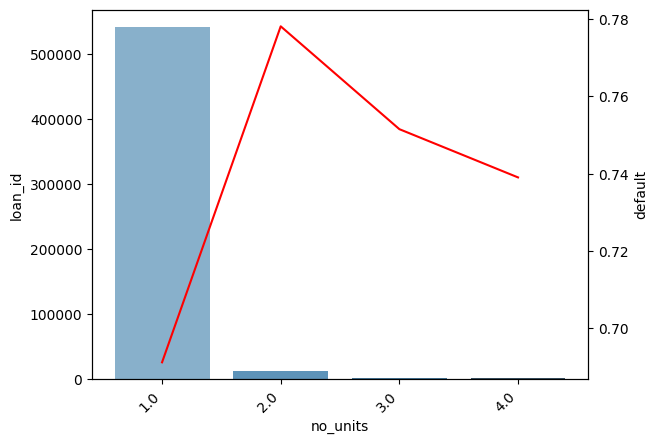

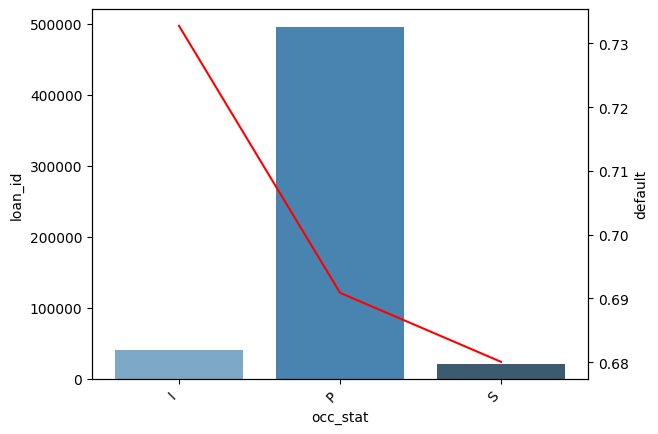

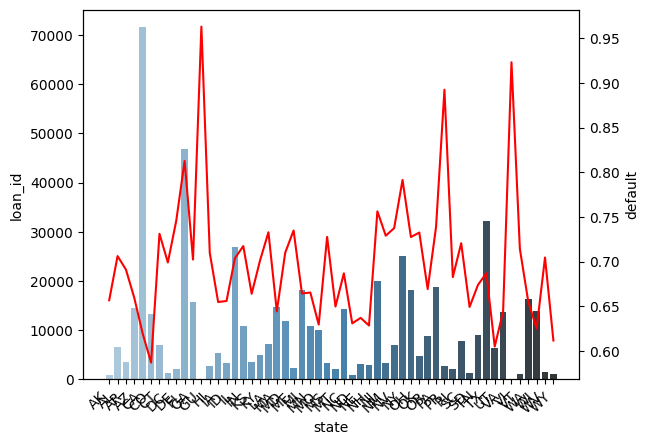

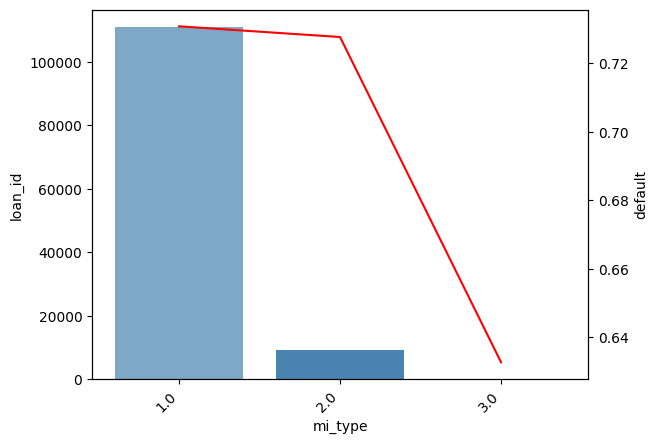

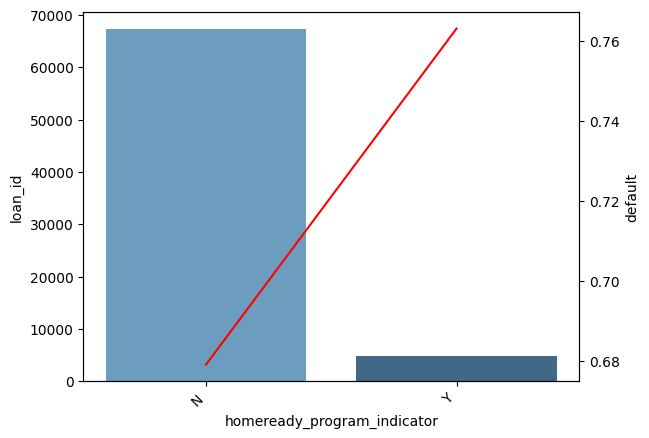

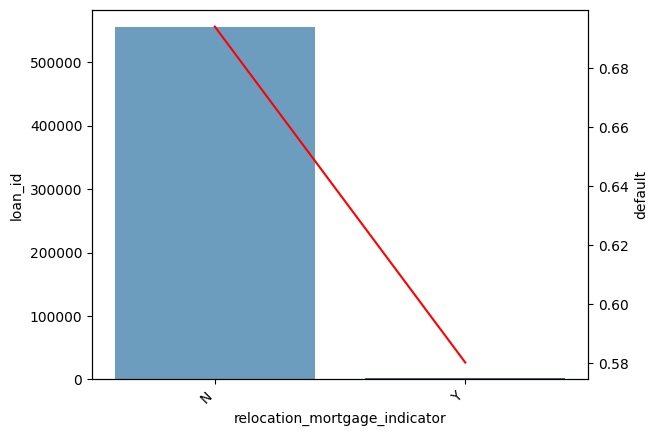

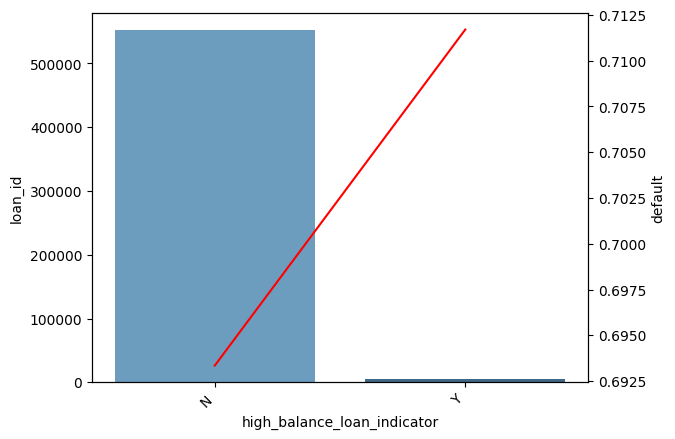

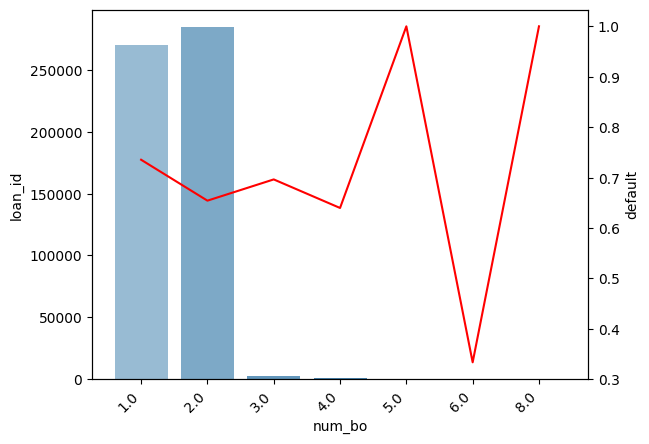

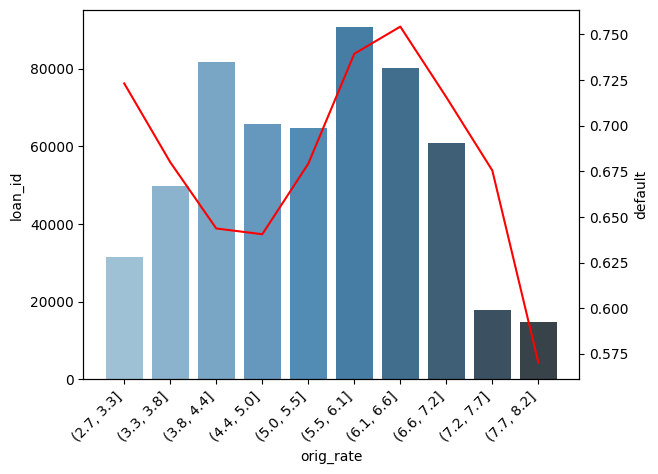

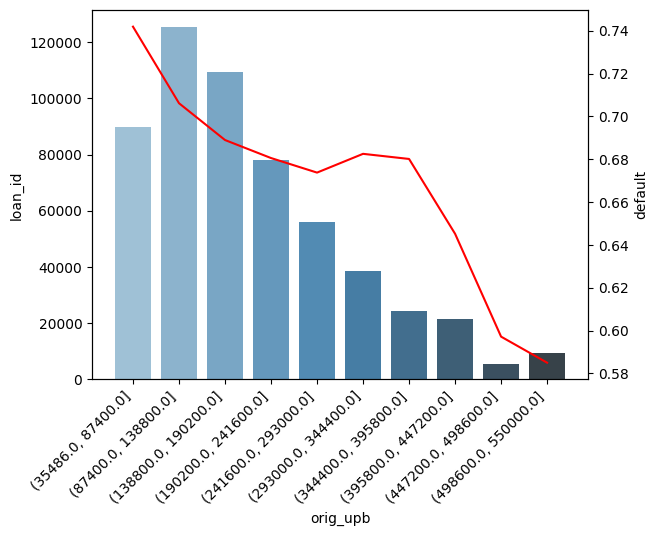

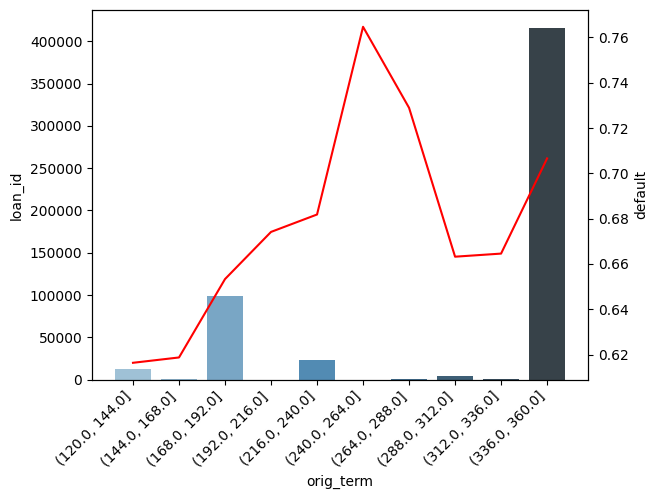

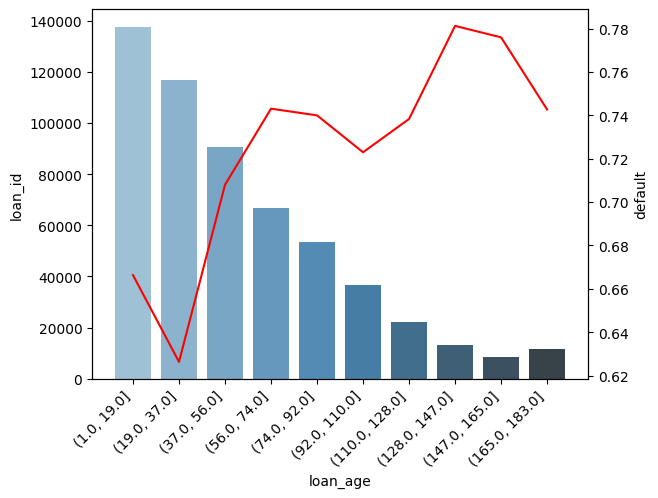

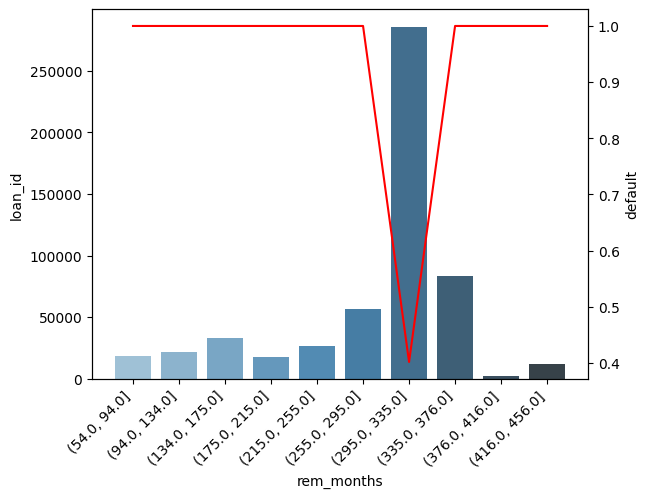

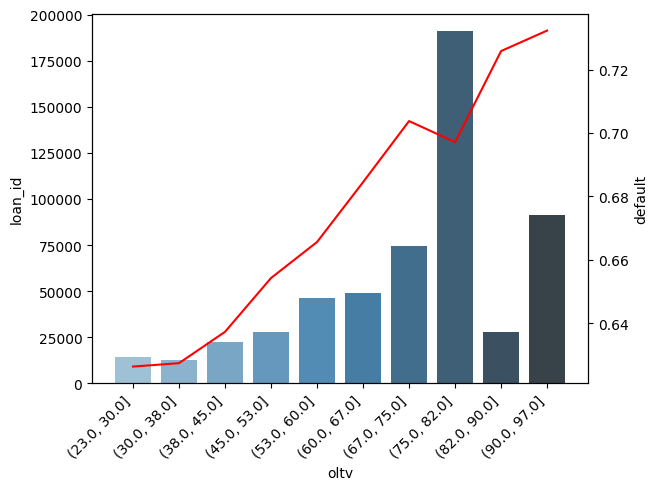

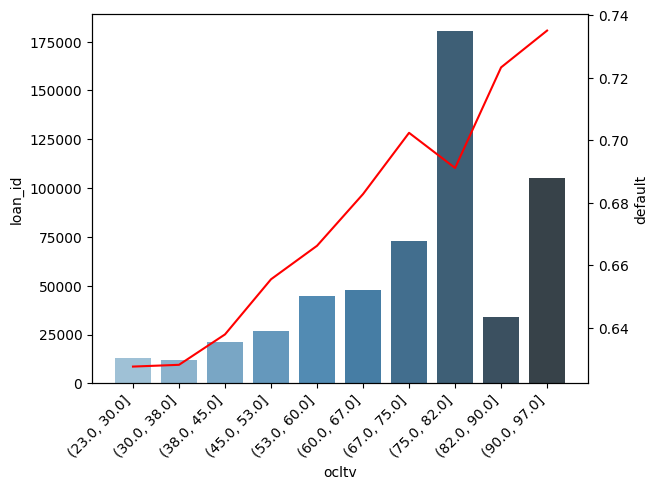

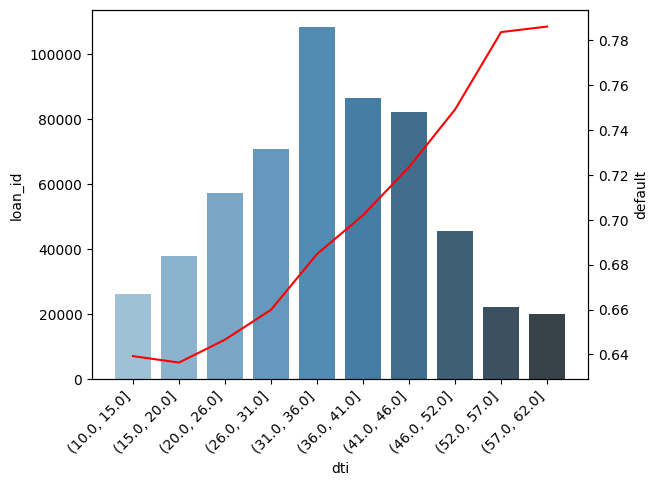

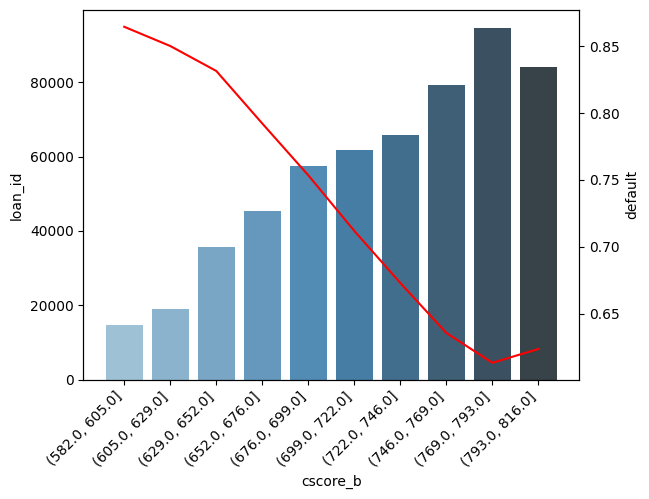

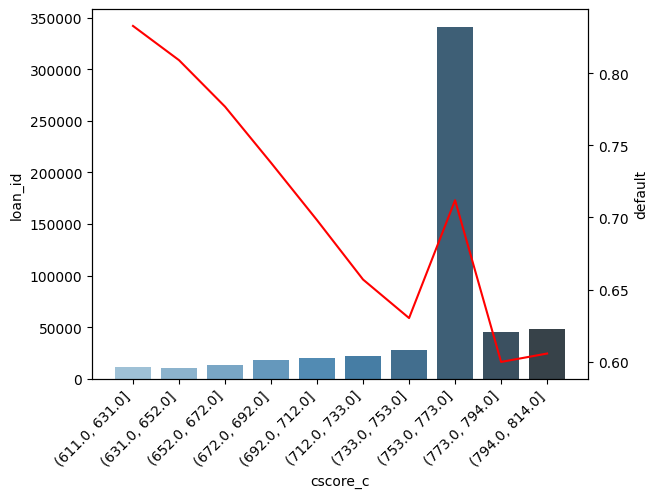

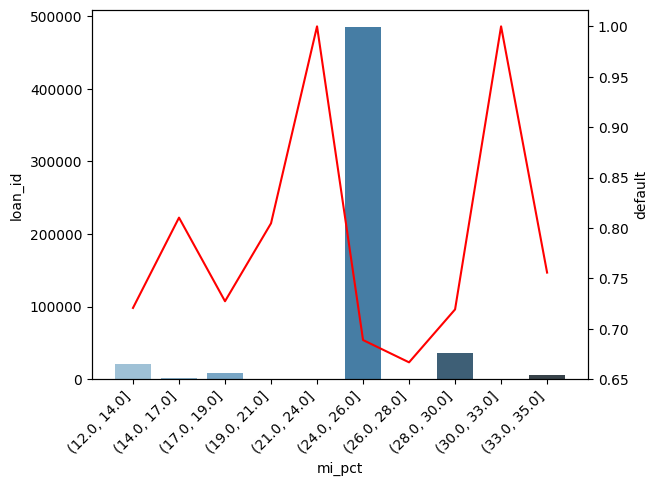

In [53]:
for i in (vars_to_plot):
    univariate_plot_v3(df,i,'default',10)

In [54]:
# Step 8
def univariate_plot_overlay(df,x_var,y_var_1,y_var_2,bin_size):
    if x_var in num_cols:
        s1 = df.groupby([pd.cut(df[x_var],bins=10)]).mean([y_var_1,y_var_2])
        p1 = sns.lineplot(data=s1, x=s1[x_var], y=y_var_1,label=y_var_1)
        p2 = sns.lineplot(data=s1, x=s1[x_var], y=y_var_2,label=y_var_2)
    
    elif x_var in cat_cols:
        s1 = df.groupby(df[x_var]).mean([y_var_1,y_var_2])
        
        fig, ax = plt.subplots()
        
        s1 = s1[[y_var_1,y_var_2]]
        s1[x_var] = s1.index
        print(s1)
        s1.plot.bar(x=x_var, ax=ax)
        
        plt.xticks(rotation=45)
        plt.show()

In [55]:
df['prepay'] = df.apply(lambda row : 1 if row['target']=='P' else 0 , axis= 1)

In [56]:
df['default_2'] = df.apply(lambda row:1 if row['target'] == 'D' else 0, axis=1)

         default_2    prepay channel
channel                             
B         0.368461  0.284217       B
C         0.307403  0.303709       C
R         0.236647  0.316096       R


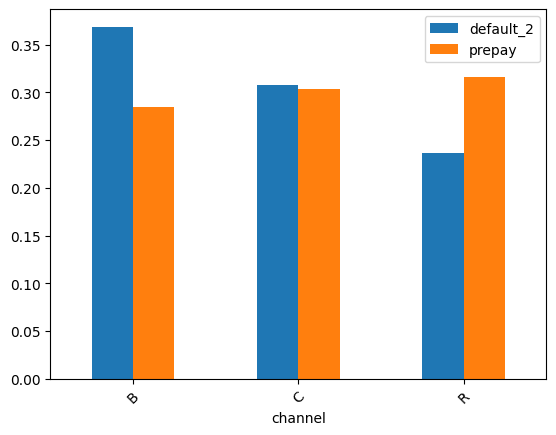

            default_2    prepay first_flag
first_flag                                
N            0.277884  0.309921          N
Y            0.322110  0.281773          Y


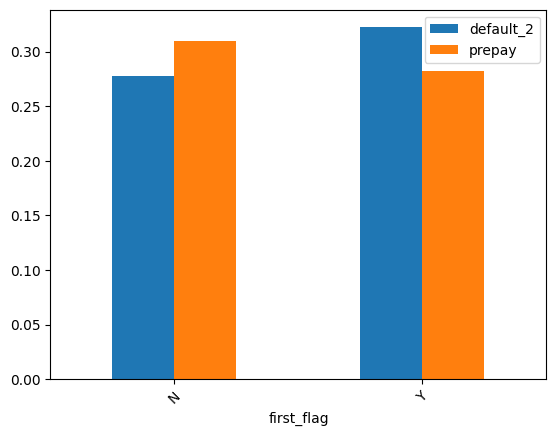

         default_2    prepay purpose
purpose                             
C         0.360573  0.268541       C
P         0.277741  0.318438       P
R         0.207485  0.333280       R
U         0.278481  0.284810       U


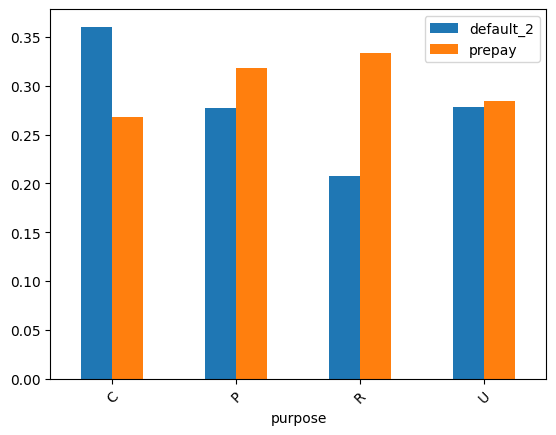

      default_2    prepay prop
prop                          
CO     0.287223  0.309221   CO
CP     0.232403  0.276445   CP
MH     0.418189  0.186310   MH
PU     0.236925  0.337789   PU
SF     0.292189  0.300707   SF


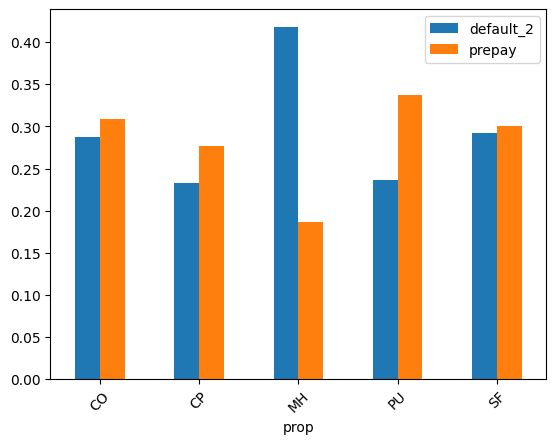

          default_2    prepay  no_units
no_units                               
1.0        0.279749  0.308882       1.0
2.0        0.415814  0.221829       2.0
3.0        0.376635  0.248474       3.0
4.0        0.300119  0.260973       4.0


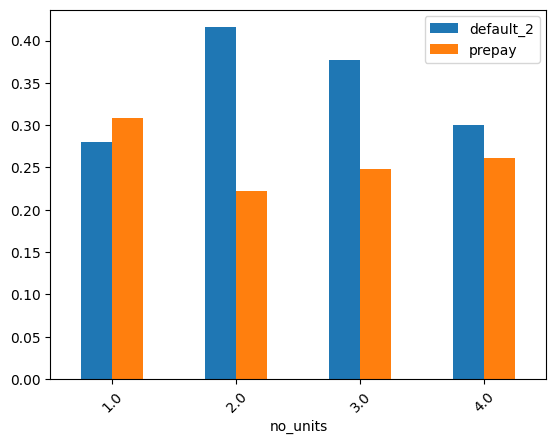

          default_2    prepay occ_stat
occ_stat                              
I          0.312450  0.267230        I
P          0.283755  0.309129        P
S          0.216493  0.319963        S


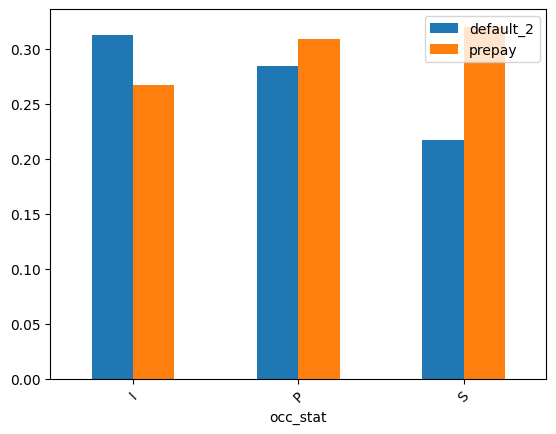

       default_2    prepay state
state                           
AK      0.130719  0.343137    AK
AL      0.242213  0.293771    AL
AR      0.225627  0.308914    AR
AZ      0.259387  0.340696    AZ
CA      0.196747  0.380651    CA
CO      0.141342  0.412894    CO
CT      0.338054  0.268800    CT
DC      0.279805  0.300892    DC
DE      0.301896  0.254254    DE
FL      0.527138  0.187365    FL
GA      0.286825  0.297661    GA
GU      0.185185  0.037037    GU
HI      0.258621  0.290105    HI
IA      0.162920  0.345161    IA
ID      0.215740  0.343968    ID
IL      0.331545  0.296193    IL
IN      0.319931  0.282555    IN
KS      0.228325  0.335935    KS
KY      0.295386  0.298610    KY
LA      0.308348  0.267096    LA
MA      0.245030  0.355578    MA
MD      0.319922  0.290022    MD
ME      0.370552  0.265125    ME
MI      0.242300  0.335633    MI
MN      0.196313  0.334538    MN
MO      0.172140  0.370393    MO
MS      0.282346  0.272325    MS
MT      0.146857  0.350196    MT
NC      0.

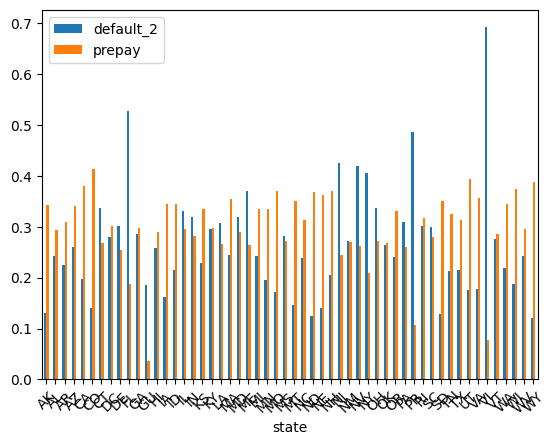

         default_2    prepay mi_type
mi_type                             
1.0       0.385807  0.269148     1.0
2.0       0.414481  0.272274     2.0
3.0       0.306122  0.367347     3.0


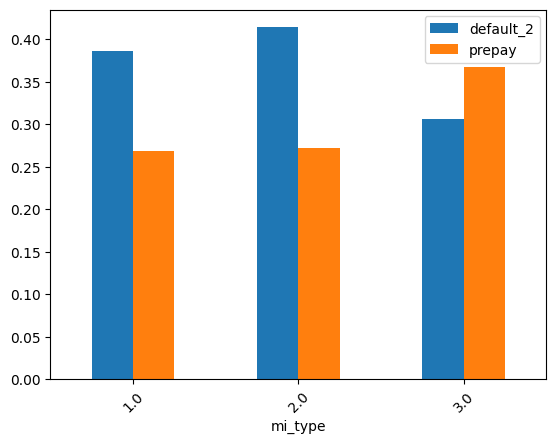

                             default_2    prepay homeready_program_indicator
homeready_program_indicator                                                 
N                             0.266552  0.320891                           N
Y                             0.400205  0.236847                           Y


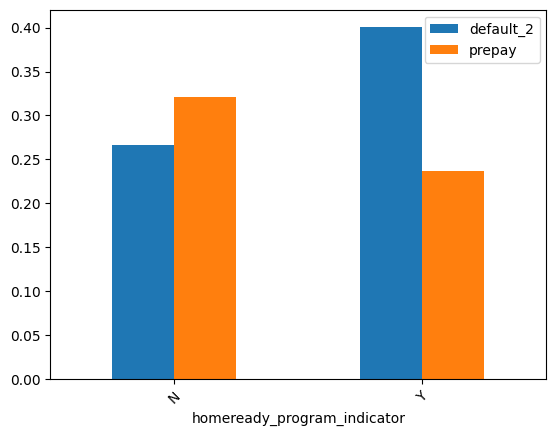

                               default_2    prepay  \
relocation_mortgage_indicator                        
N                               0.284193  0.305955   
Y                               0.100891  0.419773   

                              relocation_mortgage_indicator  
relocation_mortgage_indicator                                
N                                                         N  
Y                                                         Y  


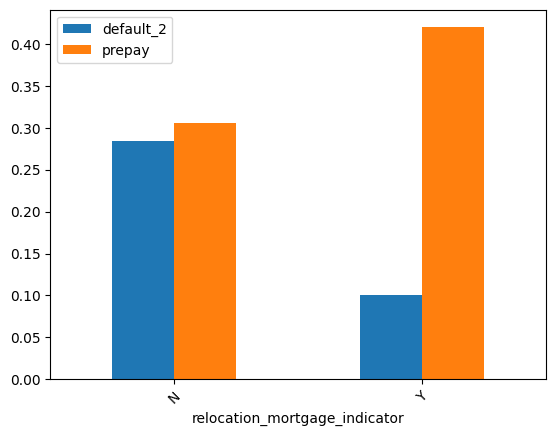

                             default_2    prepay high_balance_loan_indicator
high_balance_loan_indicator                                                 
N                             0.283661  0.306646                           N
Y                             0.256325  0.288299                           Y


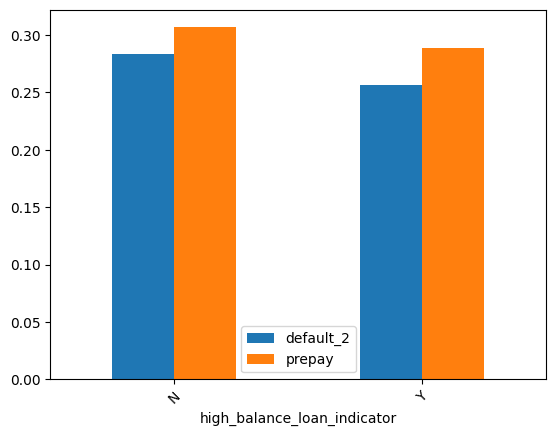

        default_2    prepay  num_bo
num_bo                             
1.0      0.360558  0.264717     1.0
2.0      0.210449  0.345898     2.0
3.0      0.287859  0.303753     3.0
4.0      0.172589  0.360406     4.0
5.0      0.142857  0.000000     5.0
6.0      0.000000  0.666667     6.0
8.0      0.500000  0.000000     8.0


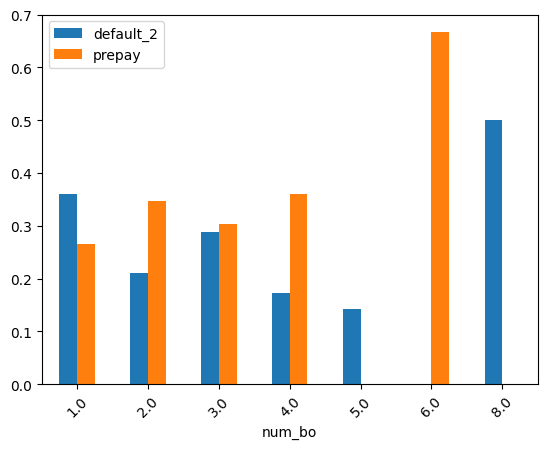

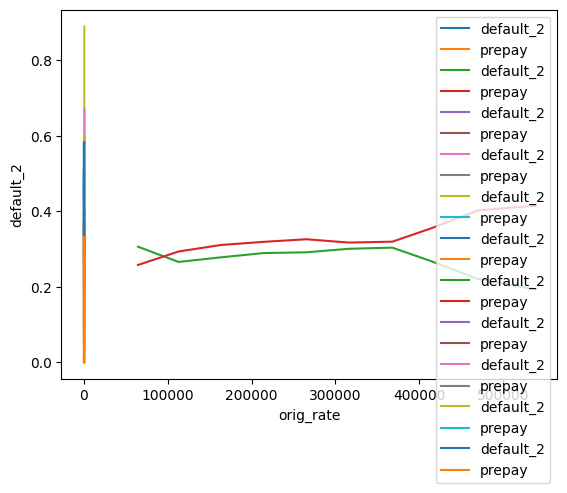

In [57]:
for i in (vars_to_plot):
    univariate_plot_overlay(df,i,'default_2','prepay',10);

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define num_cols and cat_cols based on your DataFrame
num_cols = [...]  # List of numeric column names
cat_cols = [...]  # List of categorical column names

def univariate_plot_overlay(df, x_var, y_var_1, y_var_2, bin_size):
    if x_var in num_cols:
        # Create bins with labels for the numeric variable
        df['bin'] = pd.cut(df[x_var], bins=bin_size, labels=False)
        s1 = df.groupby('bin').mean()[[y_var_1, y_var_2]]
        s1[x_var] = s1.index
        p1 = sns.lineplot(data=s1, x=x_var, y=y_var_1, label=y_var_1)
        p2 = sns.lineplot(data=s1, x=x_var, y=y_var_2, label=y_var_2)
    
    elif x_var in cat_cols:
        s1 = df.groupby(x_var).mean()[[y_var_1, y_var_2]]
        s1[x_var] = s1.index
        
        fig, ax = plt.subplots()
        s1.plot.bar(x=x_var, ax=ax)
        
        plt.xticks(rotation=45)
        plt.show()

# Example usage:
univariate_plot_overlay(df, 'Vintage', 'default_2', 'prepay', 10)


In [59]:
univariate_plot_overlay(df,'Vintage','default_2','prepay',10)

In [60]:
univariate_plot_v3(df,'Vintage','default',10)

In [61]:
df.Vintage.info()

<class 'pandas.core.series.Series'>
Int64Index: 557576 entries, 0 to 580105
Series name: Vintage
Non-Null Count   Dtype
--------------   -----
557576 non-null  int64
dtypes: int64(1)
memory usage: 24.6 MB


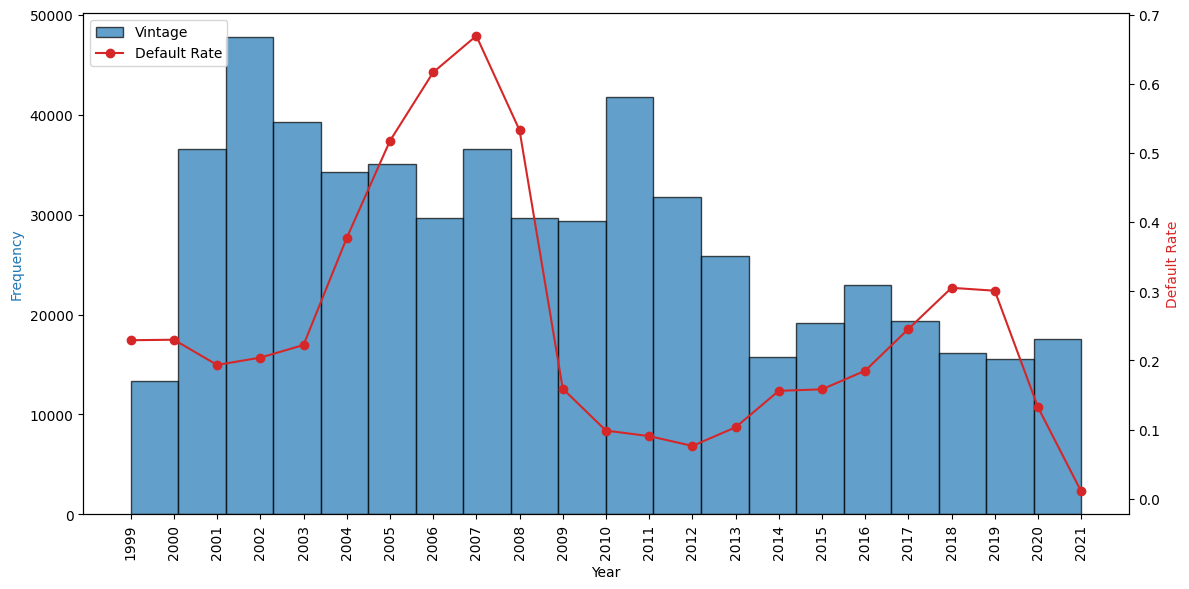

In [69]:
import matplotlib.pyplot as plt

# Calculate default rates for each year in 'Vintage'
default_rates = df.groupby('Vintage')['default_2'].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the histogram of 'Vintage' on the primary y-axis (left)
ax1.hist(df['Vintage'], bins=20, edgecolor='k', alpha=0.7, label='Vintage')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency', color='tab:blue')  # Set label color

# Create a line plot of default rates on the secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(default_rates.index, default_rates.values, color='tab:red', marker='o', label='Default Rate')
ax2.set_ylabel('Default Rate', color='tab:red')  # Set label color

# Set the x-axis ticks to show every year with a 90-degree rotation
ax1.set_xticks(default_rates.index)
ax1.tick_params(axis='x', rotation=90)

# Add legends for both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()


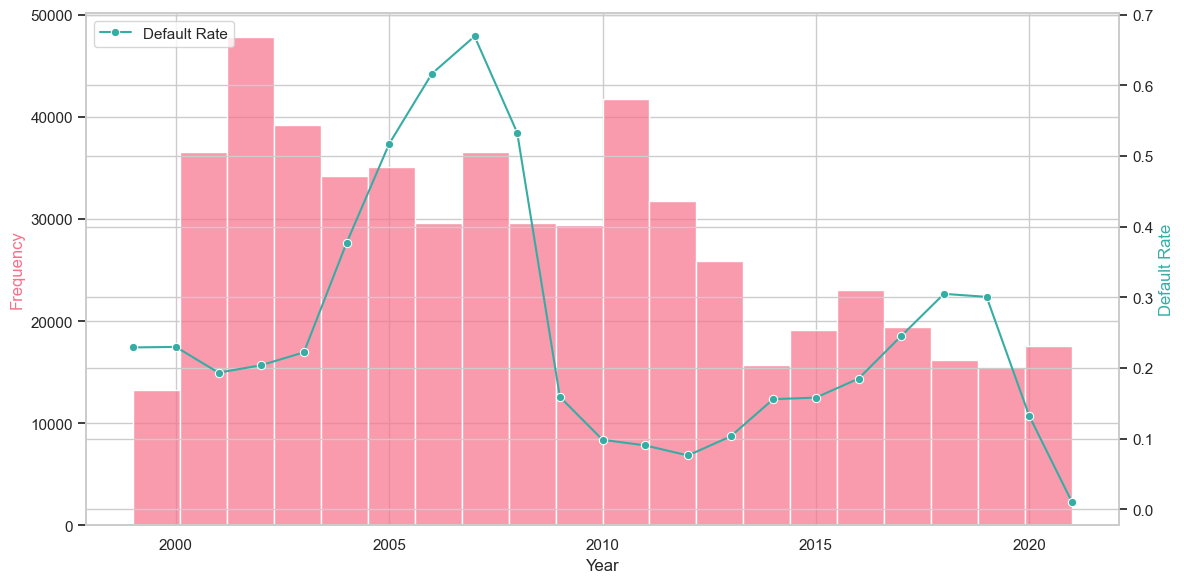

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate default rates for each year in 'Vintage'
default_rates = df.groupby('Vintage')['default_2'].mean().reset_index()

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 2)  # Define a color palette with 2 colors

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a Seaborn histogram for the 'Vintage' column
sns.histplot(data=df, x='Vintage', bins=20, color=palette[0], alpha=0.7, kde=False)
plt.xlabel('Year')
plt.ylabel('Frequency', color=palette[0])

# Create a Seaborn line plot for the default rates
ax2 = plt.gca().twinx()
sns.lineplot(data=default_rates, x='Vintage', y='default_2', color=palette[1], marker='o', label='Default Rate')
ax2.set_ylabel('Default Rate', color=palette[1])

# Set the x-axis ticks to show every year with a 90-degree rotation
plt.xticks(rotation=90)

# Add legends for both plots
lines, labels = ax2.get_legend_handles_labels()
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()
